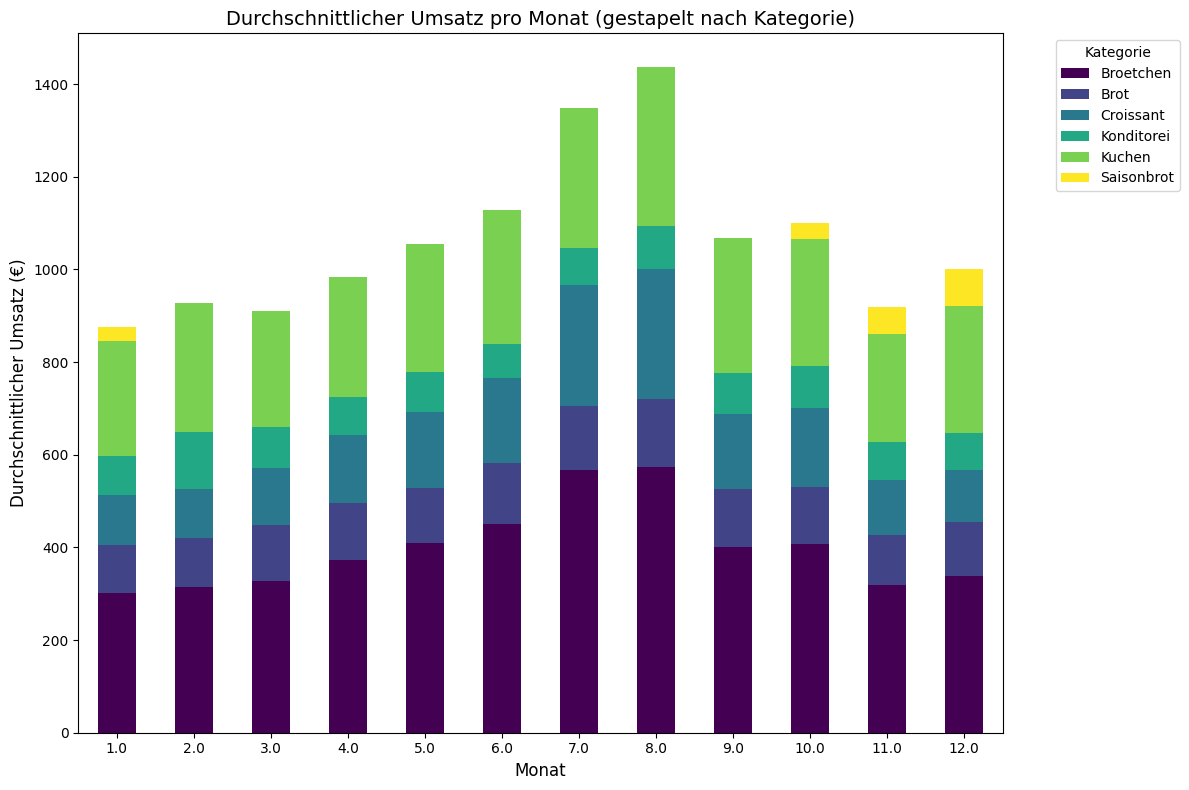

In [ ]:
# Umsatz pro Kategorie, nach Monat

import pandas as pd
import matplotlib.pyplot as plt

# Umsatzdaten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Umsatz pro Monat und Kategorie aggregieren (Durchschnitt berechnen)
umsatz_pro_kategorie = (
    umsatz_gesamt.groupby(['Monat', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Hier werden fehlende Werte durch 0 ersetzt
)

# Sicherstellen, dass alle Monate für jede Kategorie existieren (fill_value=0 bleibt)
umsatz_pro_kategorie = umsatz_pro_kategorie.fillna(0)

# Plot erstellen
umsatz_pro_kategorie.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8),  # Größeres Diagramm
    colormap='viridis'  # Farbpalette
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Monat (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Monat) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


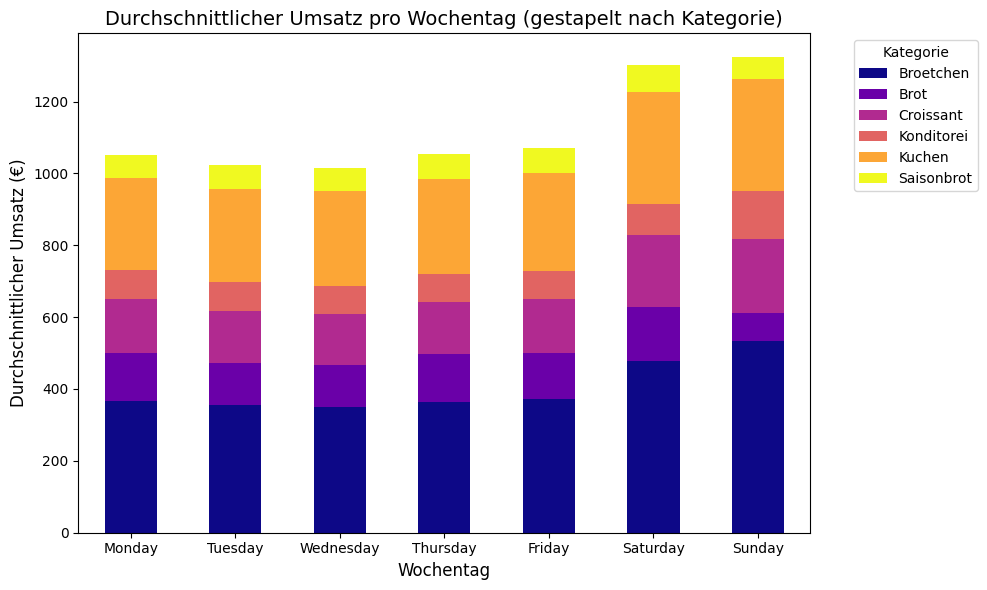

In [ ]:
# Umsatz pro Kategorie, nach Wochentag

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Umsatz pro Wochentag und Kategorie aggregieren (Durchschnitt berechnen)
umsatz_pro_wochentag = (
    umsatz_gesamt.groupby(['Wochentag', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Kategorien als Spalten
)

# Wochentage sortieren (falls nötig, je nach Sprache und Formatierung)
wochentage_sortiert = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
umsatz_pro_wochentag = umsatz_pro_wochentag.reindex(wochentage_sortiert)

# Plot erstellen
umsatz_pro_wochentag.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='plasma'  # Optionale Farbpalette
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Wochentag (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Wochentage) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


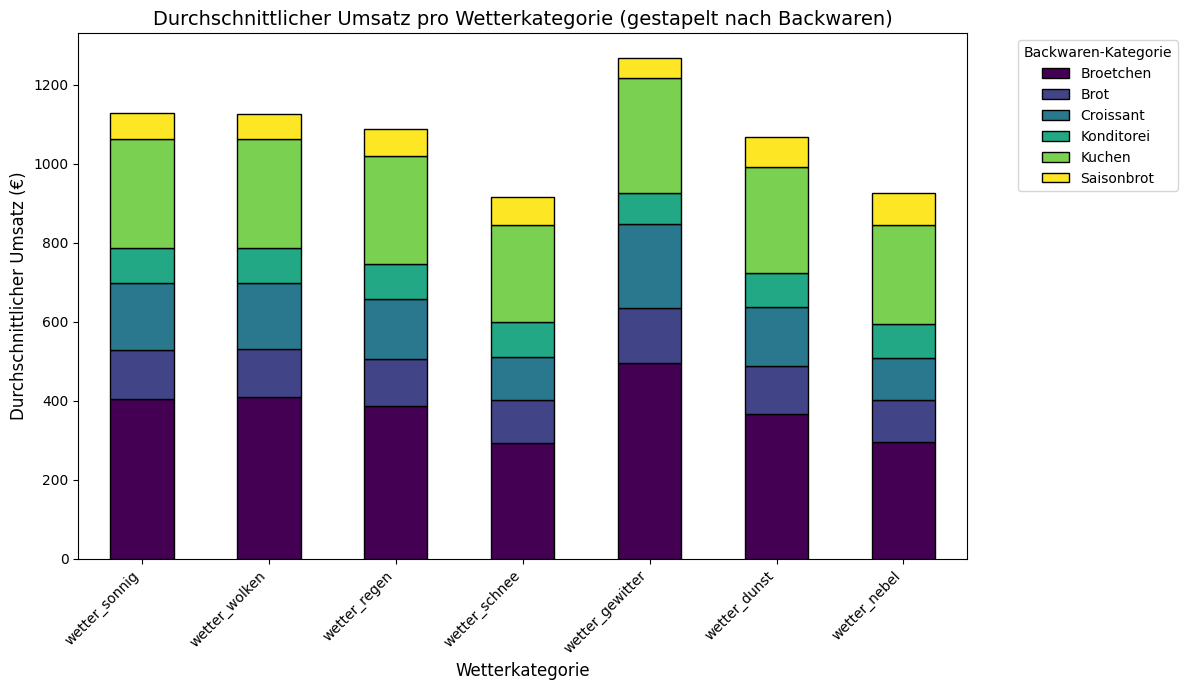

In [8]:
#Umsatz nach Wetterkategorie

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Wetterkategorien auswählen (Spalten, die mit "wetter_" beginnen)
wetterkategorien = [col for col in umsatz_gesamt.columns if col.startswith('wetter_')]

# Vorbereitung des DataFrames für die gestapelten Daten
umsatz_stacked = pd.DataFrame()

for wetter in wetterkategorien:
    # Filter für die Zeilen, bei denen das Wetter zutrifft
    gefiltert = umsatz_gesamt[umsatz_gesamt[wetter] == 1]
    
    # Durchschnittlicher Umsatz je Backwaren-Kategorie
    durchschnitt = gefiltert.groupby('Kategorie')['Umsatz'].mean()
    
    # Spalte mit dem Wetter hinzufügen
    durchschnitt.name = wetter
    
    # Zusammenführen
    umsatz_stacked = pd.concat([umsatz_stacked, durchschnitt], axis=1)

# Fehlende Werte mit 0 ersetzen
umsatz_stacked = umsatz_stacked.fillna(0).T  # Transponieren für Wetterkategorien auf der X-Achse

# Plot erstellen
umsatz_stacked.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='viridis',  # Optionale Farbpalette
    edgecolor='black'
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Wetterkategorie (gestapelt nach Backwaren)', fontsize=14)
plt.xlabel('Wetterkategorie', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Wetterkategorien leicht schräg darstellen
plt.legend(title='Backwaren-Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


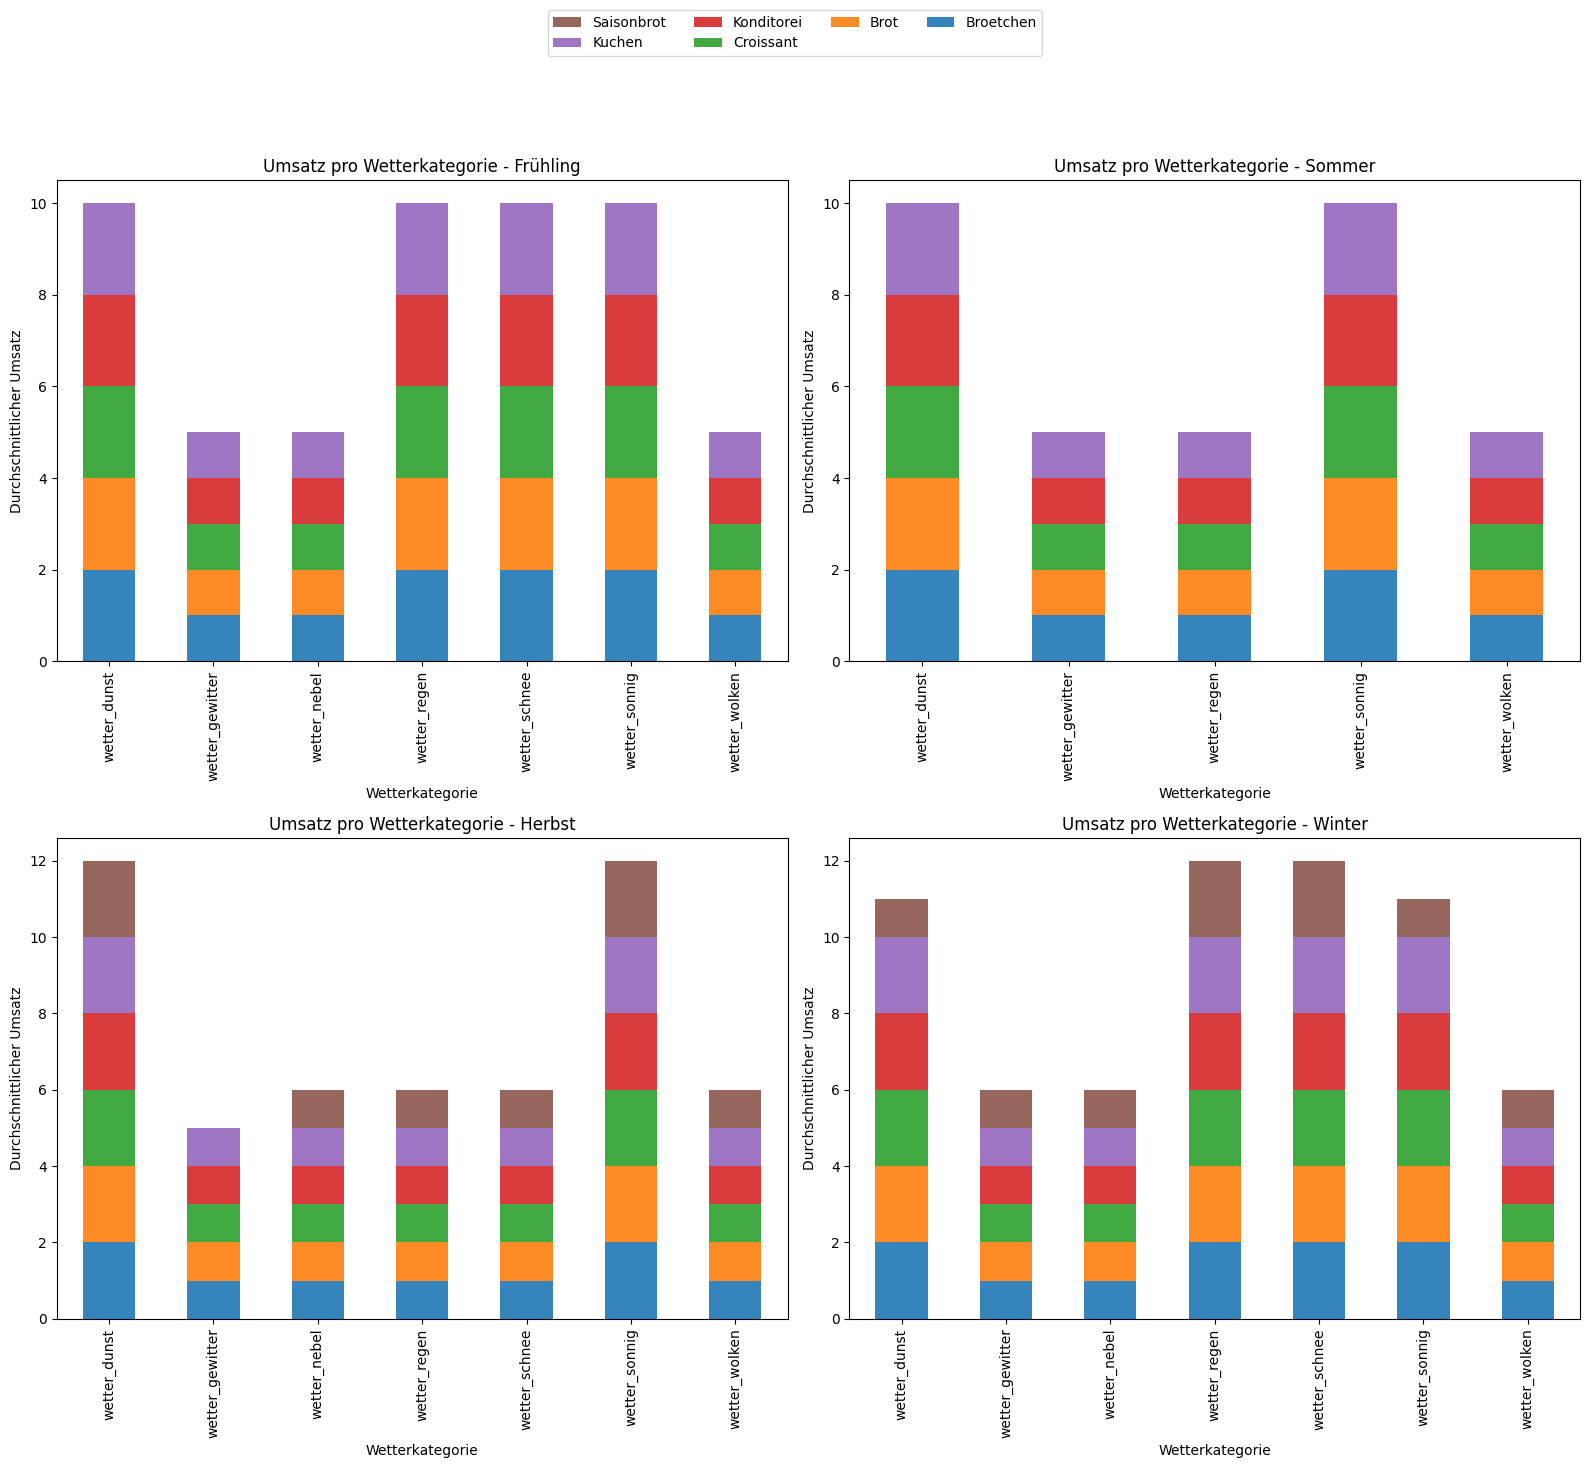

In [ ]:
#Umsatz pro Wetterkategorie, nach Jahreszeit

import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# NaN-Werte in der Monatsspalte entfernen
umsatz_gesamt = umsatz_gesamt.dropna(subset=['Monat'])

# Monat in Ganzzahlen konvertieren
umsatz_gesamt['Monat'] = umsatz_gesamt['Monat'].astype(int)

# Jahreszeit bestimmen
def get_jahreszeit(monat):
    if monat in [12, 1, 2]:
        return 'Winter'
    elif monat in [3, 4, 5]:
        return 'Frühling'
    elif monat in [6, 7, 8]:
        return 'Sommer'
    elif monat in [9, 10, 11]:
        return 'Herbst'

umsatz_gesamt['Jahreszeit'] = umsatz_gesamt['Monat'].apply(get_jahreszeit)

# Wetterkategorien definieren
wetter_cols = ['wetter_sonnig', 'wetter_wolken', 'wetter_regen', 'wetter_schnee', 'wetter_gewitter', 'wetter_dunst', 'wetter_nebel']

# Gruppieren nach Jahreszeit, Wetterkategorie und Backwaren-Kategorie
umsatz_gesamt_grouped = umsatz_gesamt.groupby(
    ['Jahreszeit'] + wetter_cols + ['Kategorie']
).Umsatz.mean().reset_index()

# Jahreszeiten definieren
jahreszeiten = ['Frühling', 'Sommer', 'Herbst', 'Winter']

# Erstelle die Subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))  # Größere Grafik
axes = axes.flatten()

# Definiere eine benutzerdefinierte Farbpalette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

for i, jahreszeit in enumerate(jahreszeiten):
    ax = axes[i]
    
    # Daten für die aktuelle Jahreszeit filtern
    saison_data = umsatz_gesamt_grouped[umsatz_gesamt_grouped['Jahreszeit'] == jahreszeit]

    # Wetterkategorien und Umsatz zusammenfassen
    wetter_data = saison_data.melt(id_vars=['Jahreszeit', 'Kategorie'], 
                                   value_vars=wetter_cols, 
                                   var_name='Wetterkategorie', 
                                   value_name='Umsatz_Wert')  # 'Umsatz_Wert' als Wertname beibehalten

    # Nur Zeilen mit Umsatz größer als 0 beibehalten
    wetter_data = wetter_data[wetter_data['Umsatz_Wert'] > 0]

    # Pivot-Tabelle erstellen, um gestacktes Balkendiagramm zu erstellen
    pivot_data = wetter_data.pivot_table(index='Wetterkategorie', 
                                         columns='Kategorie', 
                                         values='Umsatz_Wert',  # 'Umsatz_Wert' als Wert beibehalten
                                         aggfunc='sum', 
                                         fill_value=0)

    # Plot erstellen mit benutzerdefinierter Farbpalette
    pivot_data.plot(kind='bar', stacked=True, ax=ax, color=color_palette, alpha=0.9)
    
    # Titel und Achsentitel setzen
    ax.set_title(f'Umsatz pro Wetterkategorie - {jahreszeit}', fontsize=12)
    ax.set_xlabel('Wetterkategorie', fontsize=10)
    ax.set_ylabel('Durchschnittlicher Umsatz', fontsize=10)
    
    # Entferne die Legende aus den Subplots
    ax.legend().remove()

# Eine einzige Legende außerhalb hinzufügen, und Reihenfolge der Legende umkehren
handles, labels = ax.get_legend_handles_labels()

# Umkehren der Reihenfolge der Legende
handles = handles[::-1]
labels = labels[::-1]

# Legende außerhalb hinzufügen
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), fontsize=10)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
